# **Project Name**    - Titanic Survival Prediction Project



##### **Project Type**    - Data Science Project
##### **Contribution**    - Individual
##### **Name**            - Akshit Gajanan Hedau

# **Project Summary -**

**We have given with a Tested dataset which comprises details about passengers from Titanic Ship. we have to Develop a machine learning model to predict whether a passenger survived the Titanic disaster,Dataset includes features like age, gender, ticket class, fare, cabin information etc,Handle missing values, encode categorical variables, and normalize numerical data effectively,Evaluate model performance using accuracy, precision, etc,Expected outcome: A well-trained classification model with strong survival prediction accuracy.**

# **GitHub Link -**

**https://github.com/akshithedau**

# **Problem Statement**


**We have to predict the surviavl of passengers of titanic by building a ML model which can give us an idea about their survival chances ?**

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import random
from wordcloud import WordCloud
import ast
import sklearn as sk

### Dataset Loading

In [2]:
# Load Dataset
md = pd.read_csv("tested.csv")

### Dataset First View

In [10]:
# Dataset First Look
md.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Dataset Tail look
md.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Dataset Rows & Columns count

In [14]:
# Dataset Rows & Columns count
md.shape

(418, 12)

### Dataset Information

In [16]:
# Dataset Info
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
# Check for duplicate values
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    418
Name: count, dtype: int64


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
md.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

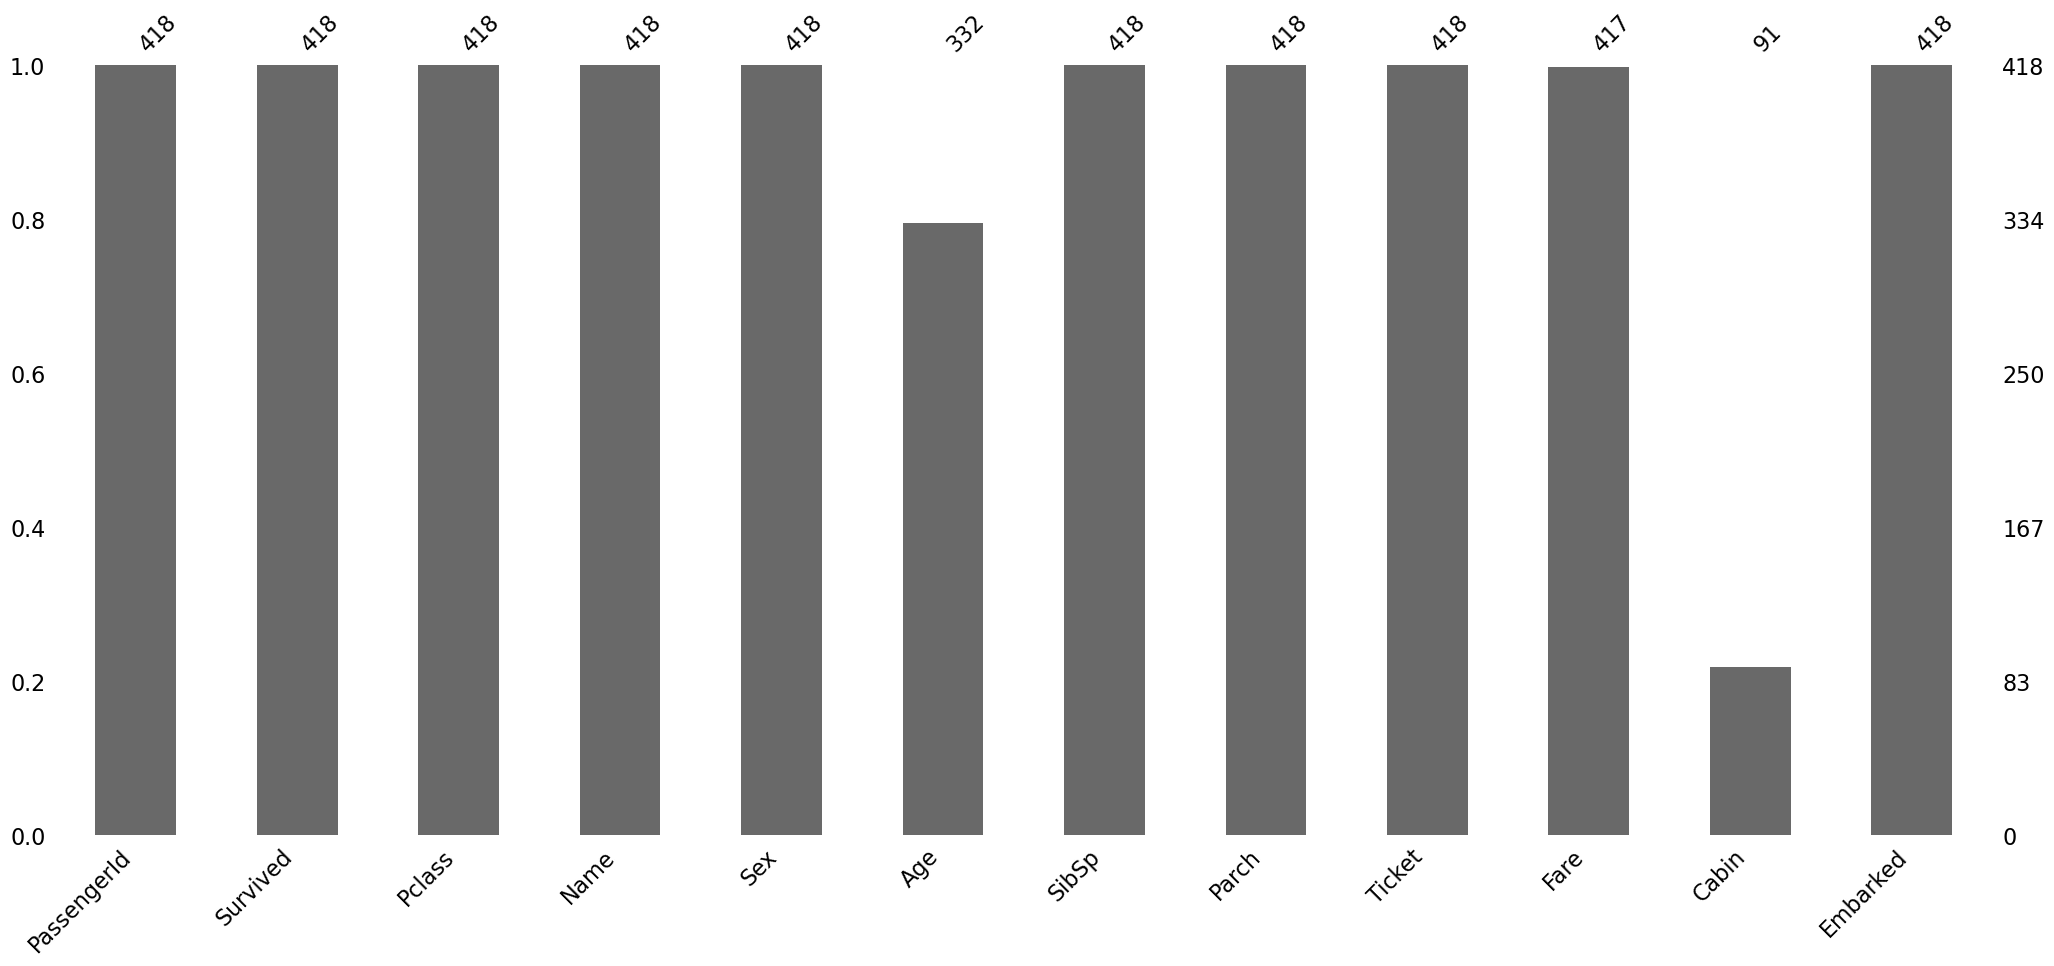

In [11]:
# Visualizing the missing values
import missingno as ms
ms.bar(md)
plt.show()

### What did you know about your dataset?

##### The following are important points about the dataset:-

1) The dataset contains 418 rows and 12 columns.
2) The Columns have no duplicate values and have some null values, the following columns have null or empty values age, fare and cabin.


##### Columns ------------- count of null or empty values

1) Age----- 86
2) Fare----- 1
3) Cabin----- 327


## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
md.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Dataset Describe
md.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Variables Description

##### The following is the description for the variables present in the dataset:-

1) PassengerId----Paasenger Unique ID.
2) Survived----Passenger who survived or not, if 1 then survived and if 0 then not survived.
3) Pclass----Class of passenger travelling into which are first class, second class and third class.
4) Name----Name of passenger.
5) Sex----Gender of passenger.
6) Age----Age of pa
7) SibSp----Sibsp is the number of siblings/spouses aboard.
8) Parch----Parch is the number of parents/children aboard.
9) Ticket----Ticket no issued to the passenger.
10) Fare----Fare indicates the amount of money spent on their ticket.
11) Cabin----Cabin indicates the cabin category occupied by the passenger.
12) Embarked----The location from where the passenger embarked on ship, three places are in the dataset which are Q-Queenstown: Passengers who embarked in Queenstown, Ireland, S-Southampton: Passengers who embarked in Southampton, England and C-Cherbourg: Passengers who embarked in Cherbourg, France.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for x in md.columns:
    print(f"{x} - {md[x].nunique()}") 

PassengerId - 418
Survived - 2
Pclass - 3
Name - 418
Sex - 2
Age - 79
SibSp - 7
Parch - 8
Ticket - 363
Fare - 169
Cabin - 76
Embarked - 3


In [22]:
md["PassengerId"].unique()

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [24]:
md["Survived"].unique()

array([0, 1], dtype=int64)

In [26]:
md["Pclass"].unique()

array([3, 2, 1], dtype=int64)

In [28]:
md["Name"].unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

In [30]:
md["Sex"].unique()

array(['male', 'female'], dtype=object)

In [32]:
md["Age"].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [34]:
md["SibSp"].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [36]:
md["Parch"].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [38]:
md["Ticket"].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [40]:
md["Fare"].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [42]:
md["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [44]:
md["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [47]:
# Write your code to make your dataset analysis ready.
# Checking null or empty values in columns
md.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
md.fillna({'Age': 'Not Available'},inplace=True)

In [51]:
md.fillna({'Fare': 'Not Available'},inplace=True)

In [53]:
md.fillna({'Cabin': 'Not Available'},inplace=True)

In [55]:
md.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [57]:
#Checking the dataset and checking changes
md.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Not Available,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,Not Available,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Not Available,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Not Available,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Not Available,S


In [59]:
#checking for duplicate values before doing visulaization
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    418
Name: count, dtype: int64


### What all manipulations have you done and insights you found?

##### The following manipulations have been done on the dataset:-

1) There were total 3 columns out of 12 which were having null or empty values, we replaced them with 'Not Available' value so as to avoid outliers while doing visualization for the columns and rows, these columns were age, fare and cabin.
2) We checked duplicate rows for the dataset and found no such row for the same and also we checked head part after doing data wrangling so as to confirm that what we have done is impacted on the dataset or not.

##### In this way doing data wrangling on the dataset, we assured that the fairness should be maintained while performing EDA and visualization on the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

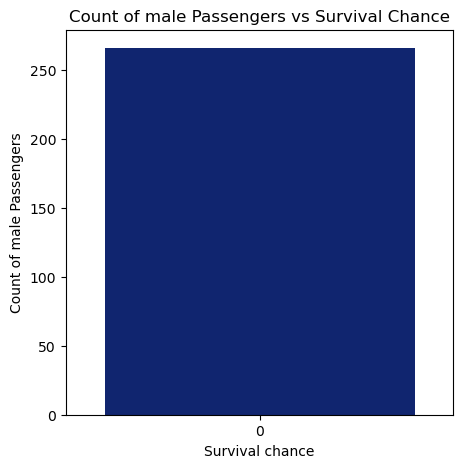

In [17]:
# Chart - 1 visualization code
# Barplot on channel_name
md_male = md[md.Sex=='male'].groupby('Survived')['Survived'].count()
md_female = md[md.Sex=='female'].groupby('Survived')['Survived'].count()

md_male_1 = pd.DataFrame(md_male)
# Rename the count column
md_male_1.rename(columns={'Survived': 'count'}, inplace=True)
md_male_1.reset_index(inplace=True)


plt.figure(figsize=(5, 5))  # Adjust figure size
sns.barplot(data=md_male_1, x='Survived', y='count', hue='Survived', palette="dark", legend=False)

# Rotate x-axis labels for better readability
plt.xlabel("Survival chance")
plt.ylabel("Count of male Passengers")
plt.title("Count of male Passengers vs Survival Chance")

# Show the plot
plt.show()

In [25]:
md_male.head()

Survived
0    266
Name: Survived, dtype: int64

#### Chart - 2

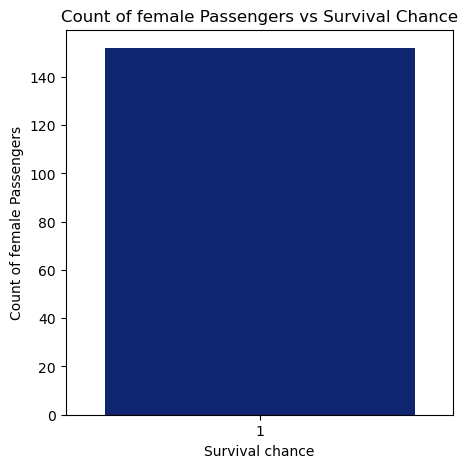

In [19]:
# Chart - 2 visualization code
md_female_1 = pd.DataFrame(md_female)
# Rename the count column
md_female_1.rename(columns={'Survived': 'count'}, inplace=True)
md_female_1.reset_index(inplace=True)


plt.figure(figsize=(5, 5))  # Adjust figure size
sns.barplot(data=md_female_1, x='Survived', y='count', hue='Survived', palette="dark", legend=False)

# Rotate x-axis labels for better readability
plt.xlabel("Survival chance")
plt.ylabel("Count of female Passengers")
plt.title("Count of female Passengers vs Survival Chance")

# Show the plot
plt.show()

In [27]:
md_female.head()

Survived
1    152
Name: Survived, dtype: int64

#### Chart - 3

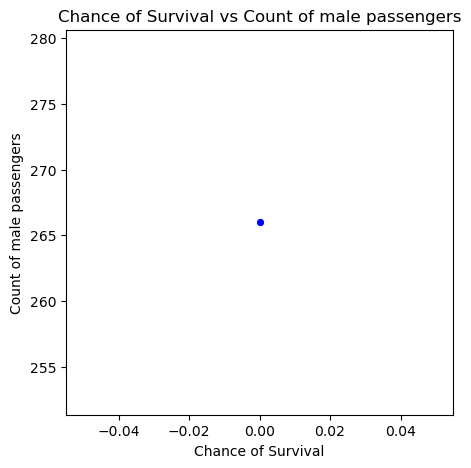

In [31]:
# Chart - 3 visualization code
plt.figure(figsize=(5, 5))  
sns.lineplot(data=md_male_1, x="Survived", y="count", marker="o", color="b")
# Rotate x-axis labels for better readability 
plt.xlabel("Chance of Survival")
plt.ylabel("Count of male passengers")
plt.title("Chance of Survival vs Count of male passengers")
# Show the plot
plt.show()

#### Chart - 4

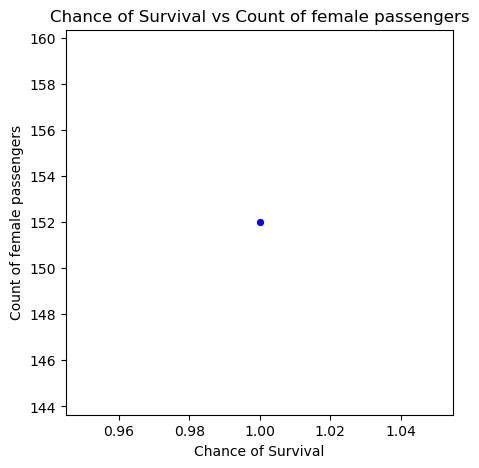

In [33]:
# Chart - 4 visualization code
plt.figure(figsize=(5, 5))  
sns.lineplot(data=md_female_1, x="Survived", y="count", marker="o", color="b")
# Rotate x-axis labels for better readability 
plt.xlabel("Chance of Survival")
plt.ylabel("Count of female passengers")
plt.title("Chance of Survival vs Count of female passengers")
# Show the plot
plt.show()

#### Chart - 5

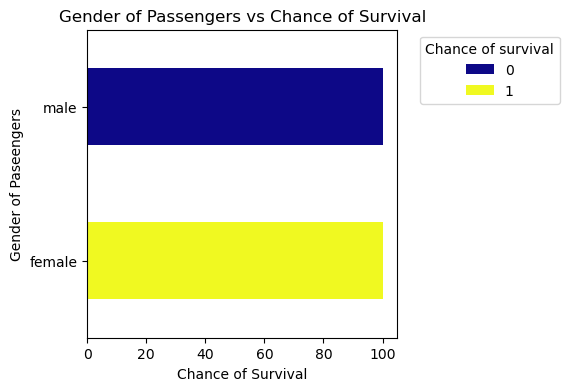

In [37]:
# Chart - 5 visualization code
# Convert groupby Series to DataFrame and reset index
df = md.groupby(["Sex", "Survived"]).size().unstack(fill_value=0)
dfu = df.div(df.sum(axis=1), axis=0) * 100
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))
dfu.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)

# Labels and title
plt.xlabel("Chance of Survival")
plt.ylabel("Gender of Paseengers")
plt.title("Gender of Passengers vs Chance of Survival")
plt.legend(title="Chance of survival", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

#### Chart - 6

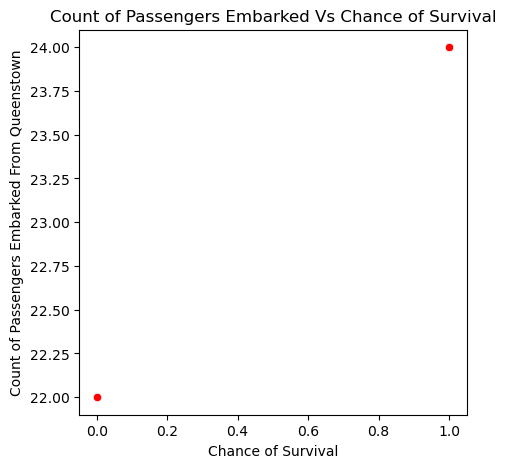

In [45]:
# Chart - 6 visualization code
md_Q = md[md.Embarked=="Q"].groupby('Survived')['Survived'].count()
md_S = md[md.Embarked=="S"].groupby('Survived')['Survived'].count()
md_C = md[md.Embarked=="C"].groupby('Survived')['Survived'].count()

md_Q_1 = pd.DataFrame(md_Q)
# Rename the count column
md_Q_1.rename(columns={'Survived': 'count'}, inplace=True)
md_Q_1.reset_index(inplace=True)

plt.figure(figsize=(5,5))
sns.scatterplot(x='Survived',y='count',data=md_Q_1,color='r')
plt.xlabel('Chance of Survival')
plt.ylabel('Count of Passengers Embarked From Queenstown')
plt.title('Count of Passengers Embarked Vs Chance of Survival')
plt.show()

In [51]:
md_Q_1.head()

,Survived,count
0,0,22
1,1,24


#### Chart - 7

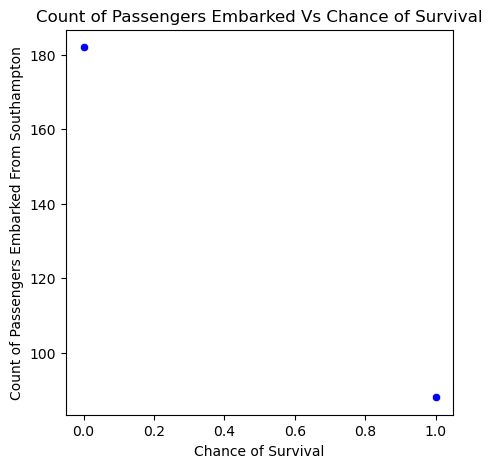

In [47]:
# Chart - 7 visualization code
md_S_1 = pd.DataFrame(md_S)
# Rename the count column
md_S_1.rename(columns={'Survived': 'count'}, inplace=True)
md_S_1.reset_index(inplace=True)

plt.figure(figsize=(5,5))
sns.scatterplot(x='Survived',y='count',data=md_S_1,color='b')
plt.xlabel('Chance of Survival')
plt.ylabel('Count of Passengers Embarked From Southampton')
plt.title('Count of Passengers Embarked Vs Chance of Survival')
plt.show()

In [53]:
md_S_1.head()

,Survived,count
0,0,182
1,1,88


#### Chart - 8

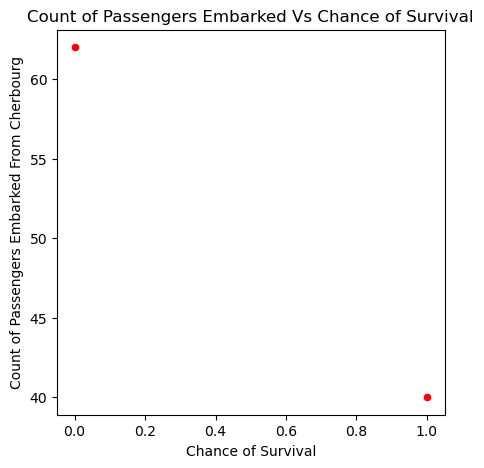

In [49]:
# Chart - 8 visualization code
md_C_1 = pd.DataFrame(md_C)
# Rename the count column
md_C_1.rename(columns={'Survived': 'count'}, inplace=True)
md_C_1.reset_index(inplace=True)

plt.figure(figsize=(5,5))
sns.scatterplot(x='Survived',y='count',data=md_C_1,color='r')
plt.xlabel('Chance of Survival')
plt.ylabel('Count of Passengers Embarked From Cherbourg')
plt.title('Count of Passengers Embarked Vs Chance of Survival')
plt.show()

In [57]:
md_C_1.head()

,Survived,count
0,0,62
1,1,40


#### Chart - 9

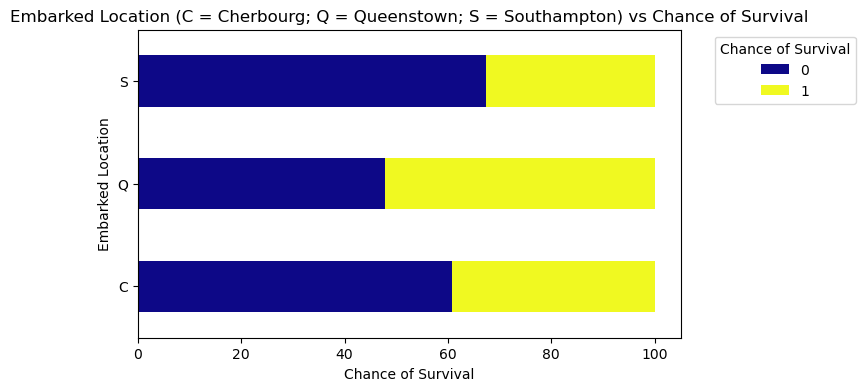

In [61]:
# Chart - 9 visualization code
# Convert groupby Series to DataFrame and reset index
em = md.groupby(["Embarked", "Survived"]).size().unstack(fill_value=0)
emu = em.div(em.sum(axis=1), axis=0) * 100
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(7, 4))
emu.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)

# Labels and title
plt.xlabel("Chance of Survival")
plt.ylabel("Embarked Location")
plt.title("Embarked Location (C = Cherbourg; Q = Queenstown; S = Southampton) vs Chance of Survival")
plt.legend(title="Chance of Survival", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [63]:
emu.head()

Survived,0,1
Embarked,,
C,60.784314,39.215686
Q,47.826087,52.173913
S,67.407407,32.592593


#### Chart - 10

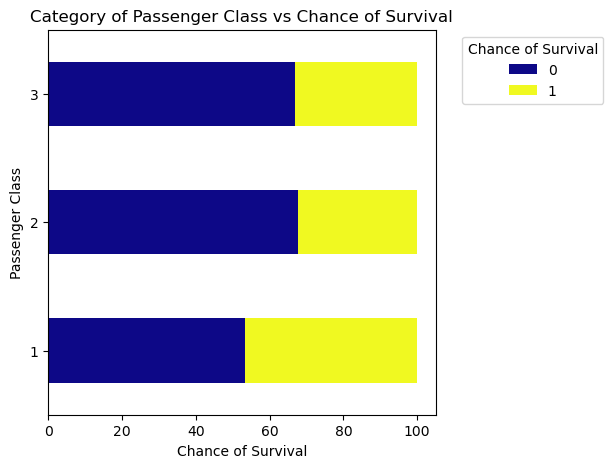

In [81]:
# Chart - 10 visualization code
# Convert groupby Series to DataFrame and reset index
p = md.groupby(["Pclass", "Survived"]).size().unstack(fill_value=0)
pu = p.div(p.sum(axis=1), axis=0) * 100
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
pu.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)

# Labels and title
plt.xlabel("Chance of Survival")
plt.ylabel("Passenger Class")
plt.title("Category of Passenger Class vs Chance of Survival")
plt.legend(title="Chance of Survival", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [83]:
pu.head()

Survived,0,1
Pclass,,
1,53.271028,46.728972
2,67.741935,32.258065
3,66.972477,33.027523


#### Chart - 11

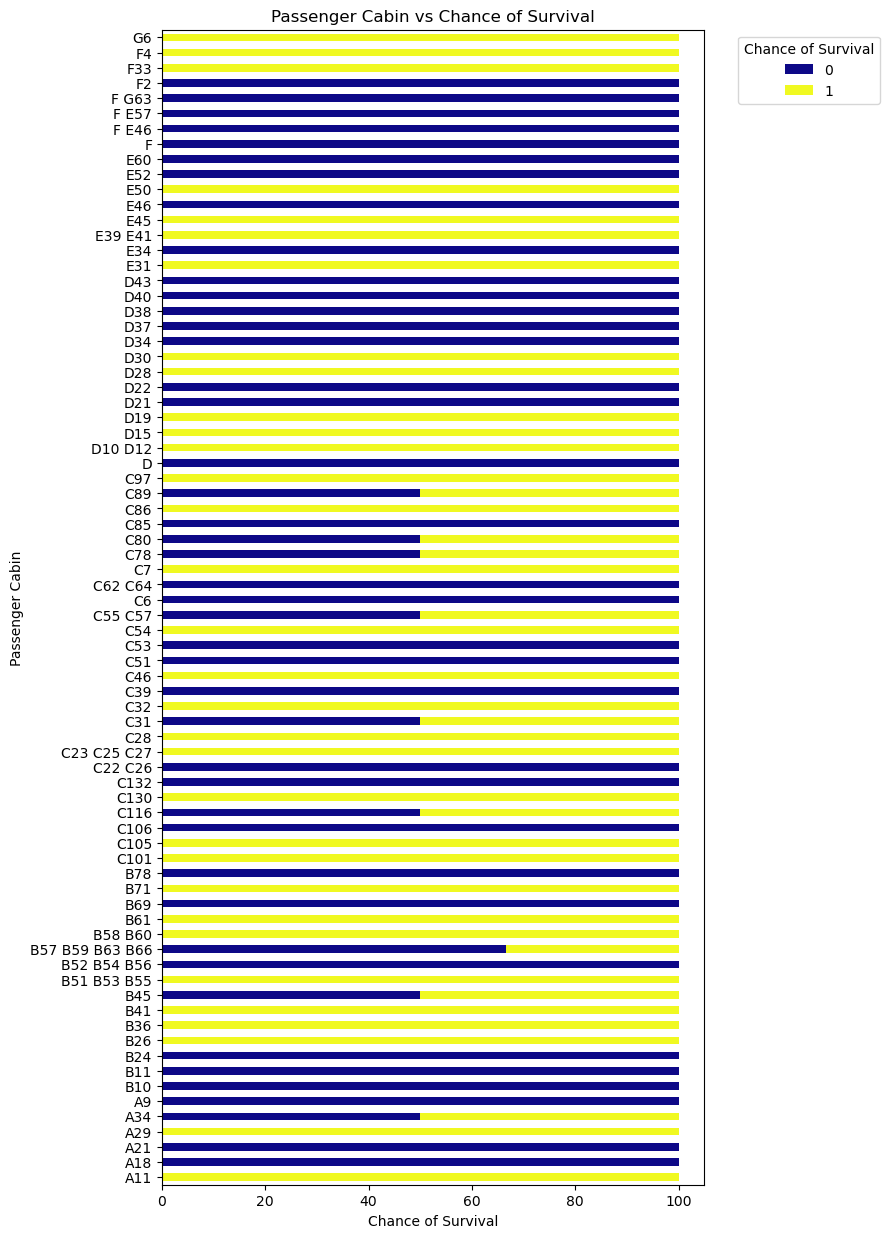

In [89]:
# Chart - 11 visualization code
# Convert groupby Series to DataFrame and reset index
ca = md.groupby(["Cabin", "Survived"]).size().unstack(fill_value=0)
cab = ca.div(ca.sum(axis=1), axis=0) * 100
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(7, 15))
cab.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)

# Labels and title
plt.xlabel("Chance of Survival")
plt.ylabel("Passenger Cabin")
plt.title("Passenger Cabin vs Chance of Survival")
plt.legend(title="Chance of Survival", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [93]:
cab.head()

Survived,0,1
Cabin,,
A11,0.0,100.0
A18,100.0,0.0
A21,100.0,0.0
A29,0.0,100.0
A34,50.0,50.0


#### Chart - 12

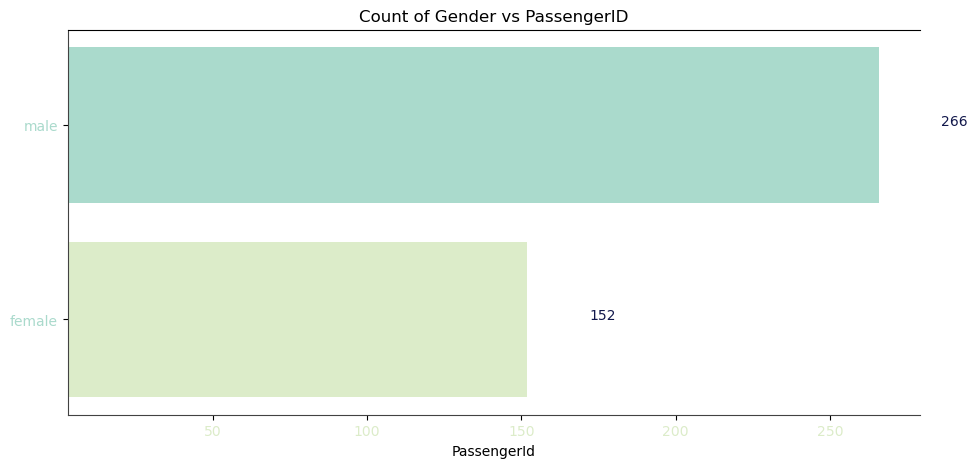

In [105]:
# Chart - 12 visualization code
gender = md.groupby("Sex").count()["PassengerId"].sort_values(ascending=True)[-10:]

height = pd.Series(gender.values)
bars = gender.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#dcecc9")
plt.yticks(y_pos, bars, color="#aadacc")
plt.xlabel("PassengerId")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#11174b')
plt.title("Count of Gender vs PassengerID")


plt.show()

In [107]:
gender.head()

Sex
female    152
male      266
Name: PassengerId, dtype: int64

#### Chart - 13

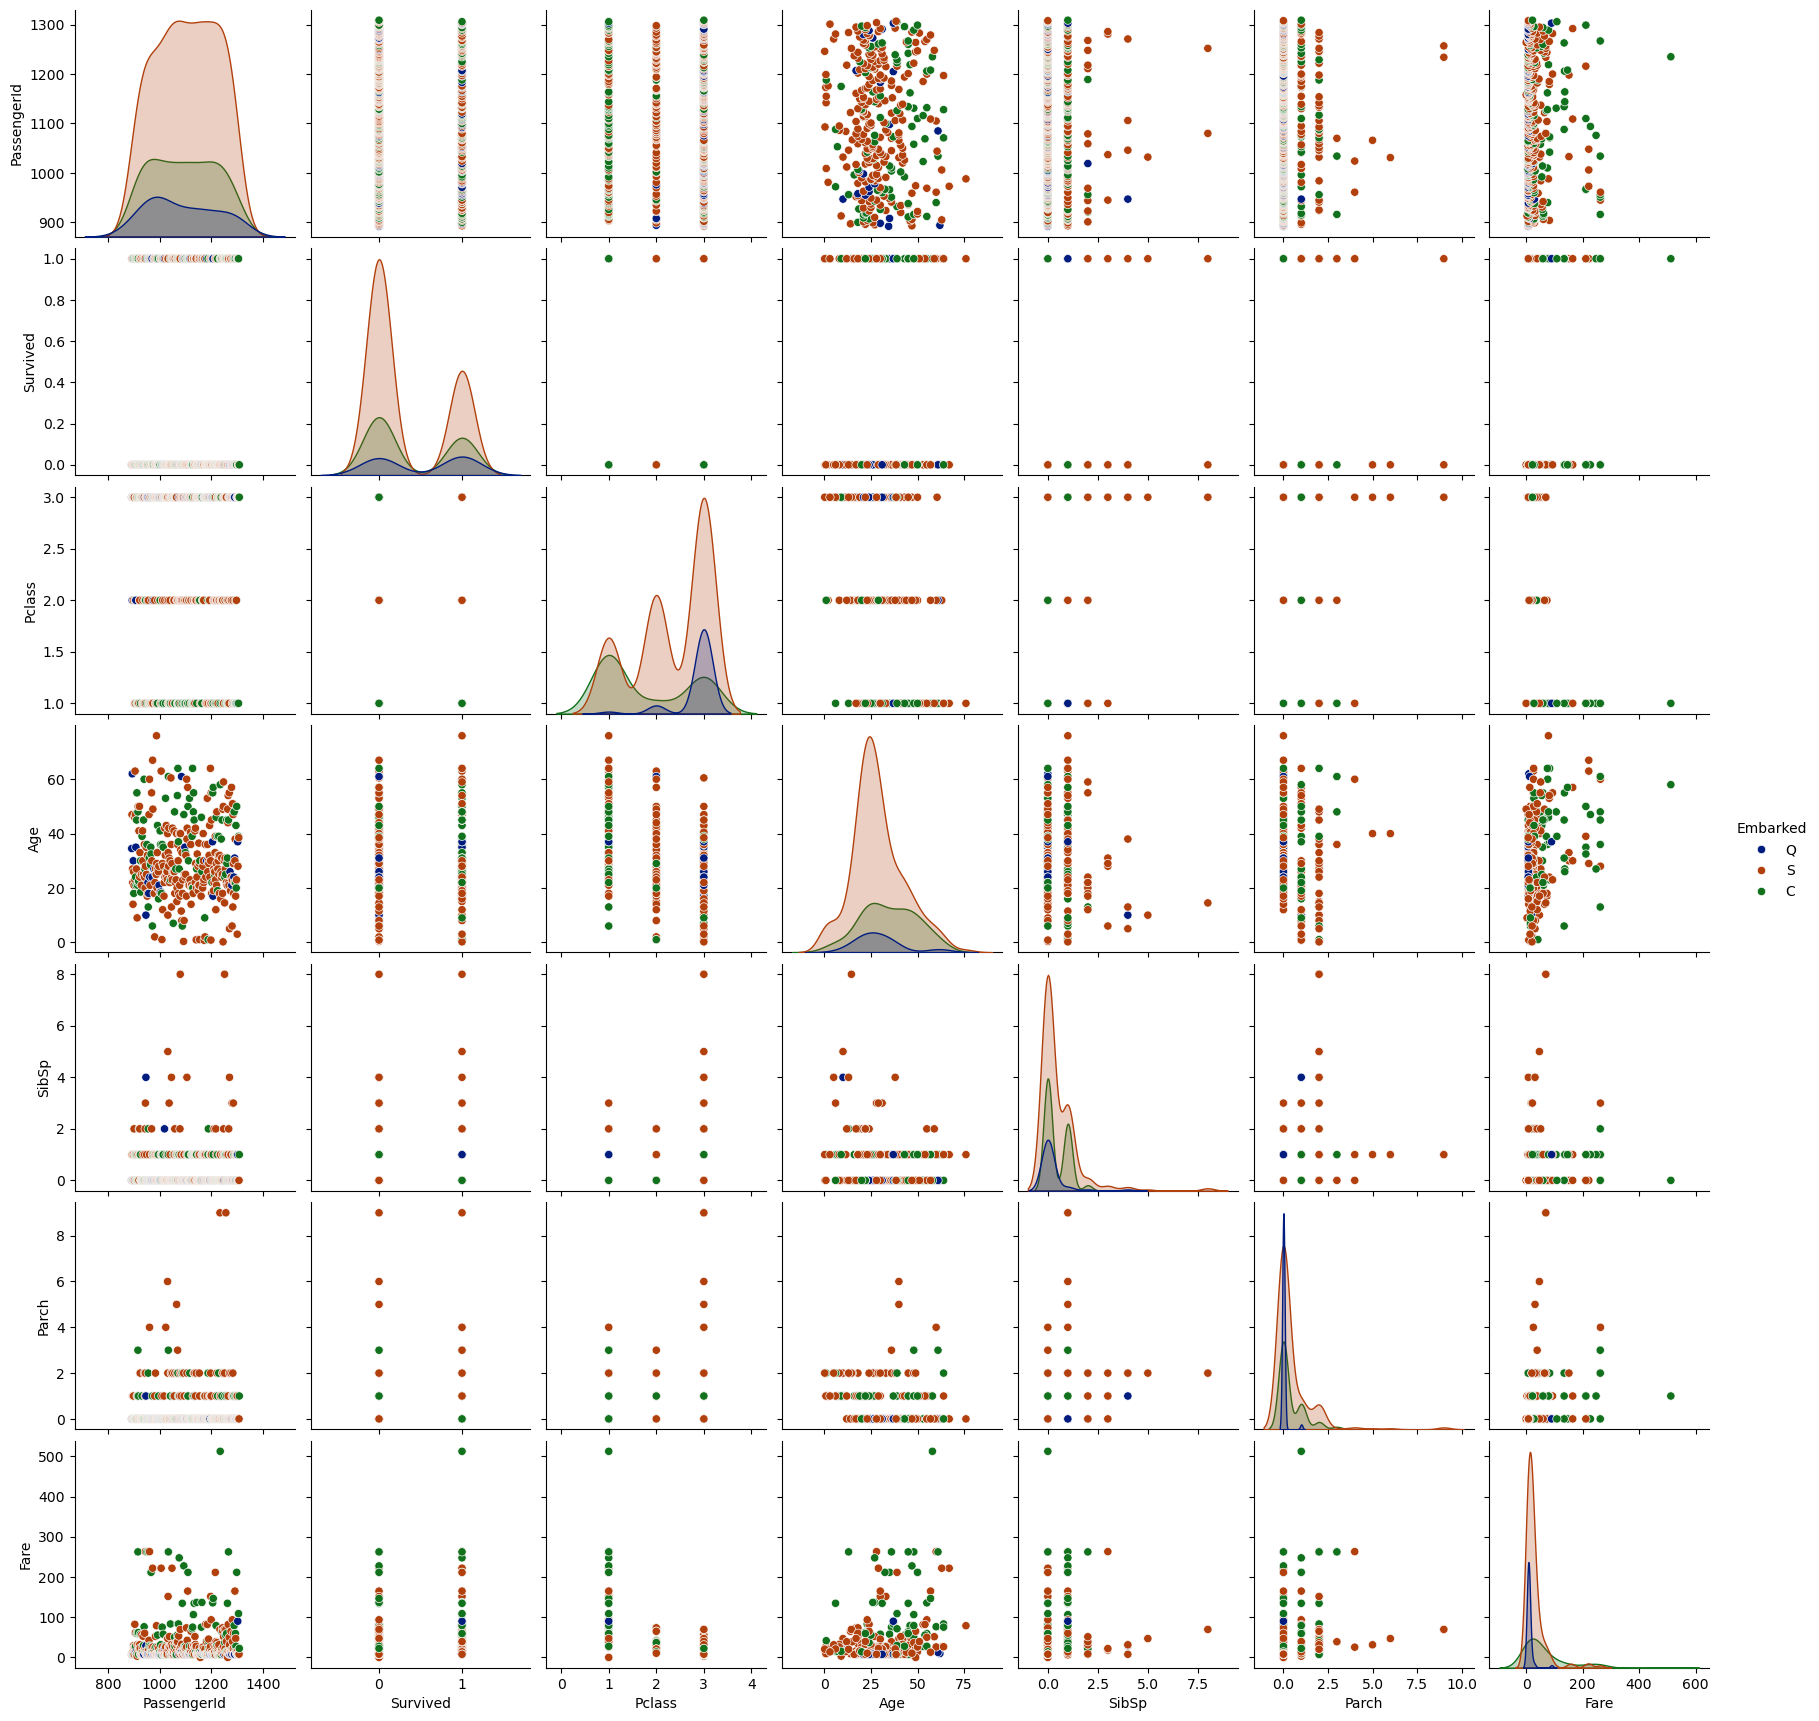

In [69]:
# Chart - 13 visualization code
z = md.select_dtypes(include='number')
z2 = md[['Embarked']]
z3 = pd.concat([z,z2],axis=1)
sns.pairplot(z3, hue="Embarked", palette="dark")
plt.show()

#### Chart - 14 - Correlation Heatmap

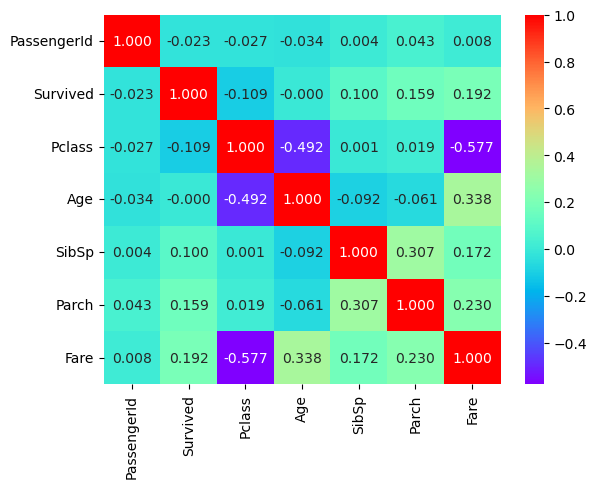

In [71]:
# Correlation Heatmap visualization code
d = md.select_dtypes(include='number')
corr_mat = d.corr()
sns.heatmap(corr_mat,annot=True,cmap="rainbow", fmt=".3f")
plt.show()

#### Chart - 15 - Pair Plot

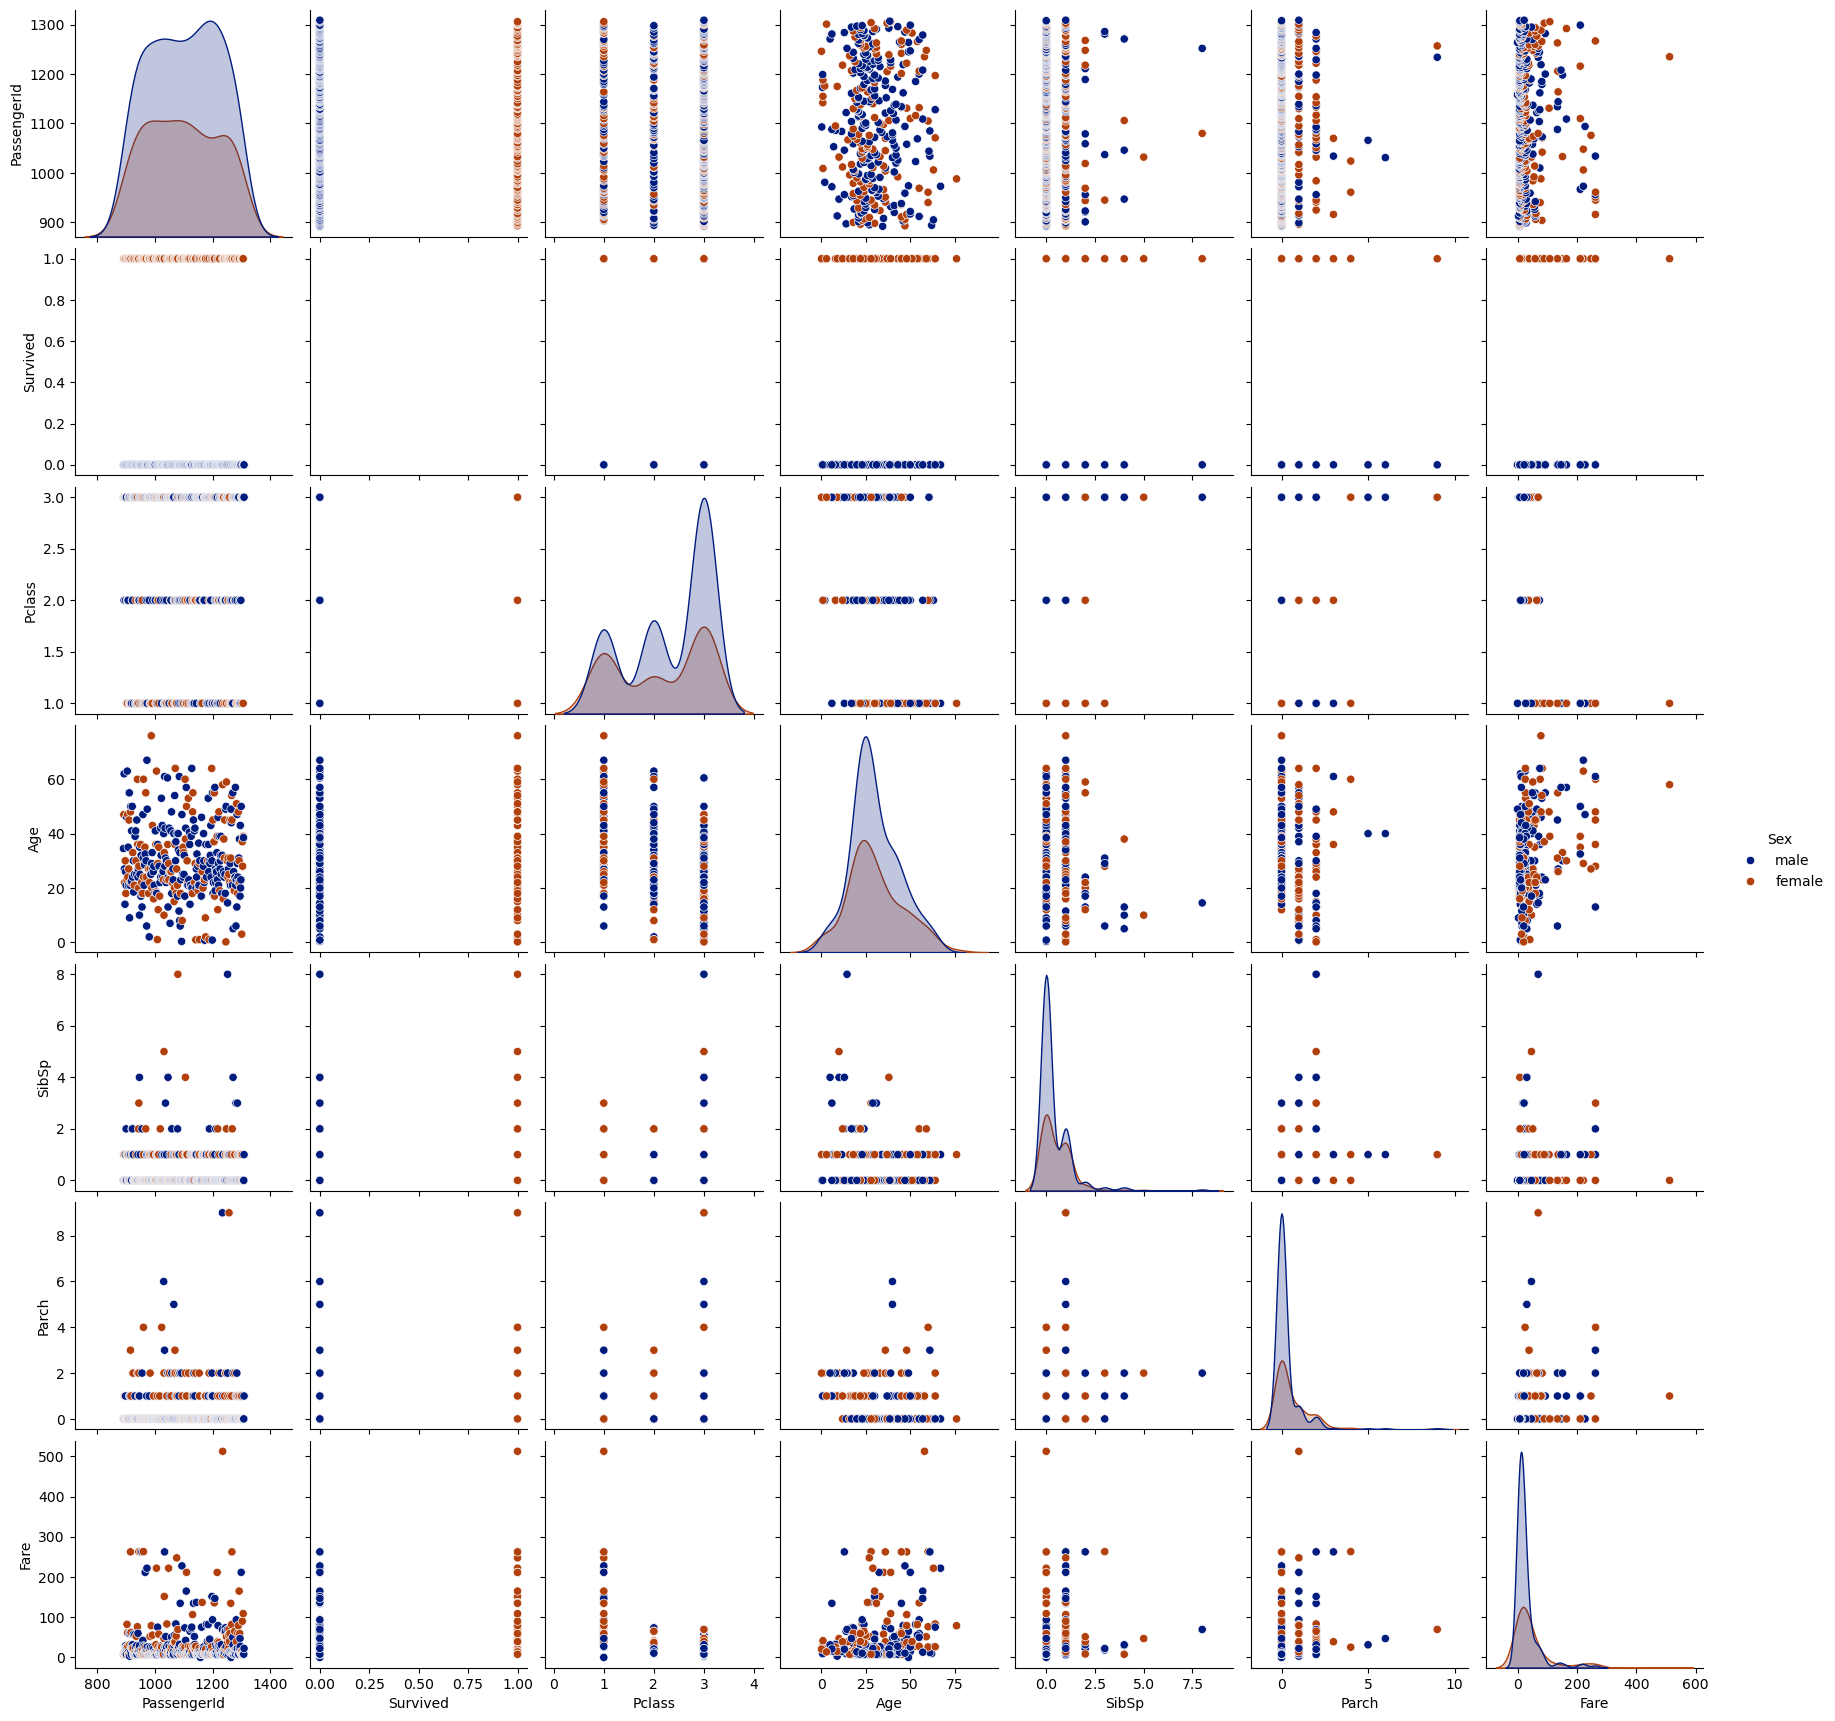

In [67]:
# Pair Plot visualization code
c = md.select_dtypes(include='number')
c2 = md[['Sex']]
c3 = pd.concat([c,c2],axis=1)
sns.pairplot(c3, hue="Sex", palette="dark")
plt.show()

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Applying a statiscal approach for hypothetical testing starting with testing on target varible "Survived".

#### 2. Perform an appropriate statistical test.

In [7]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
# Drop rows with missing IMDb scores
md_stats = md.dropna(subset=['Sex'])

# Separate IMDb scores for movies and TV shows
md_stats_1 = md_stats[md_stats['Survived'] == '0']['Sex']
md_stats_2 = md_stats[md_stats['Survived'] == '1']['Sex']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(md_stats_1, md_stats_2, equal_var=False)

# Print results
print("Hypothesis 1: Gender of Passenger vs chance of survival")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 1:
    print("Result: Passenger not survived")
else:
    print("Result: Passenger Surivived")


Hypothesis 1: Gender of Passenger vs chance of survival
T-Statistic: nan, P-Value: nan
Result: Passenger Surivived


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Applying a different approach for hypothetical testing with testing on target varible "Survived".

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(md['Survived'], 1)

# Print results
print("\nHypothesis 3: Average Chance of Survival > 1")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.7 and t_stat < 0:
    print("Result: Chance of Survival failed")
else:
    print("Result: Chance of Survival Passed")


Hypothesis 3: Average Chance of Survival > 1
T-Statistic: -27.0139, P-Value: 0.0000
Result: Chance of Survival failed


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [68]:
# filling missing values with suitable words or statements 
md.fillna({
    'Age': 'Not Available',
    'Fare': '0',
    'Cabin': 'Not Assigned'}, inplace=True)

In [70]:
# Handling Missing Values & Missing Value Imputation
md.dropna(subset=["Survived"], inplace=True)

# Reset index after dropping rows
md.reset_index(drop=True, inplace=True)

# Verify missing values are removed
missing_values_summary = md.isnull().sum()
missing_values_summary

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 2. Handling Outliers

In [80]:
# Handling Outliers & Outlier treatments
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    418
Name: count, dtype: int64


### 3. Categorical Encoding

In [84]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_cols = md.select_dtypes(include=['object']).columns.tolist()
# Apply Label Encoding to categorical columns (for simplicity)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    md[col] = le.fit_transform(md[col].astype(str))
    label_encoders[col] = le

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

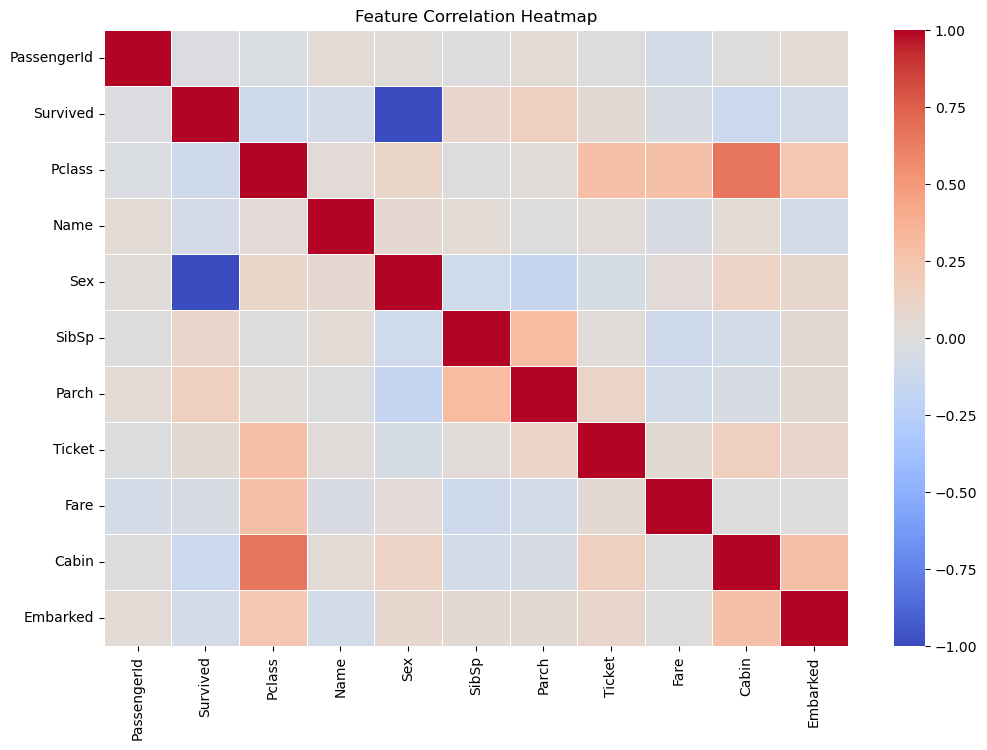

In [93]:
# Manipulate Features to minimize feature correlation and create new features
import numpy as np


# Compute correlation matrix
corr_matrix = md.corr()

# Visualizing correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### 2. Feature Selection

In [95]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression

# Step 1: Remove low-variance features
var_thresh = VarianceThreshold(threshold=0.01)  # Remove near-constant features
filtered_df = md.copy()
filtered_df = pd.DataFrame(var_thresh.fit_transform(filtered_df), columns=md.columns[var_thresh.get_support()])

# Step 2: Drop highly correlated features (above 0.9 correlation)
corr_matrix = filtered_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
filtered_df.drop(columns=high_corr_features, inplace=True)

# Step 3: Select top features using Mutual Information
X = filtered_df.drop(columns=["Survived"])  # Assuming imdb_score is the target variable
y = md["Survived"]
mi_scores = mutual_info_regression(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Select top 15 most important features
selected_features = mi_scores_series.head(15).index.tolist()
filtered_df = filtered_df[selected_features + ["Survived"]]  # Keep target variable

# Verify selected features
filtered_df.head()


,Fare,Embarked,Ticket,Pclass,PassengerId,Name,SibSp,Parch,Cabin,Survived
0,140,1,152,3,892,206,0,0,76,0
1,121,2,221,3,893,403,1,0,76,1
2,167,1,73,2,894,269,0,0,76,0
3,157,2,147,3,895,408,0,0,76,0
4,8,2,138,3,896,178,1,1,76,1


### 5. Data Transformation

In [99]:
# Transform Your data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Step 1: Apply Log Transformation to skewed columns
skewed_cols = ["Survived"]  # Updated list
filtered_df[skewed_cols] = filtered_df[skewed_cols].apply(lambda x: np.log1p(x))  # log(1 + x) to handle zeros

# Step 2: Standardization (Z-score normalization) for normally distributed features
std_scaler = StandardScaler()
std_cols = ["Pclass", "SibSp", "Parch"]
filtered_df[std_cols] = std_scaler.fit_transform(filtered_df[std_cols])

# Step 3: Min-Max Scaling for remaining numerical features
minmax_scaler = MinMaxScaler()
scaled_cols = list(set(filtered_df.columns) - set(std_cols) - set(skewed_cols) - {"Survived"})  # Exclude target variable
filtered_df[scaled_cols] = minmax_scaler.fit_transform(filtered_df[scaled_cols])

# Verify transformed data
filtered_df.head()


,Fare,Embarked,Ticket,Pclass,PassengerId,Name,SibSp,Parch,Cabin,Survived
0,0.828402,0.5,0.419890,0.873482,0.000000,0.494005,-0.499470,-0.400248,1.0,0.000000
1,0.715976,1.0,0.610497,0.873482,0.002398,0.966427,0.616992,-0.400248,1.0,0.693147
2,0.988166,0.5,0.201657,-0.315819,0.004796,0.645084,-0.499470,-0.400248,1.0,0.000000
3,0.928994,1.0,0.406077,0.873482,0.007194,0.978417,-0.499470,-0.400248,1.0,0.000000
4,0.047337,1.0,0.381215,0.873482,0.009592,0.426859,0.616992,0.619896,1.0,0.693147


### 6. Dimensionality Reduction

In [104]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Step 1: Determine the number of components needed to retain 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
principal_components = pca.fit_transform(filtered_df.drop(columns=["Survived"]))  # Exclude target variable

# Create a new dataframe with reduced dimensions
pca_df = pd.DataFrame(principal_components, columns=[f"PCA_{i+1}" for i in range(principal_components.shape[1])])
pca_df["Survived"] = filtered_df["Survived"].values  # Add target variable back

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_.sum()
pca_df.head(), explained_variance

(      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
 0 -0.613472  0.900134  0.024944 -0.332873  0.400587  0.126037 -0.045410   
 1  0.200303  0.896004 -0.770975  0.090004  0.122625  0.347149  0.322651   
 2 -0.681838 -0.256437  0.070035 -0.223662  0.469416 -0.003132  0.173193   
 3 -0.597397  0.968840  0.012816  0.088743  0.244311  0.144872  0.394409   
 4  0.930647  0.805160 -0.047610  0.191858 -0.011722  0.309541 -0.518275   
 
    Survived  
 0  0.000000  
 1  0.693147  
 2  0.000000  
 3  0.000000  
 4  0.693147  ,
 0.9705986440986754)

### 7. Data Splitting

In [106]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split



# Define features and target variable
target = 'Survived'  # Adjust this based on your dataset
X = pca_df.drop(columns=[target])
y = pca_df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify the shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((334, 7), (84, 7), (334,), (84,))

### 8. Handling Imbalanced Dataset

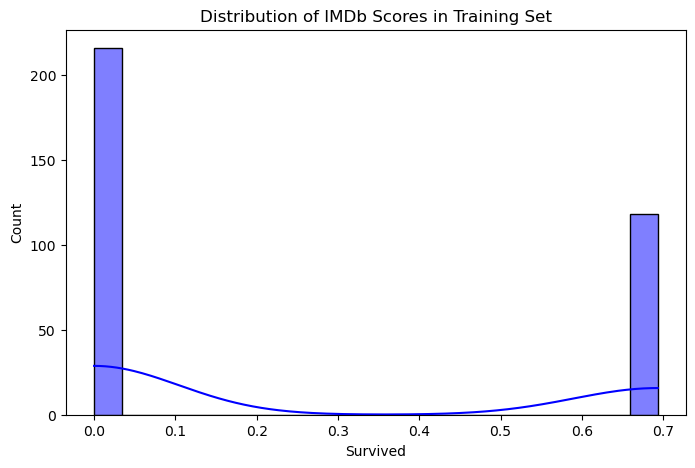

In [109]:
# Handling Imbalanced Dataset (If needed)
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=20, kde=True, color="blue")
plt.title("Distribution of IMDb Scores in Training Set")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


## ***7. ML Model Implementation***

### ML Model - 1

In [113]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select features and target variable
target = 'Survived'
features = [col for col in md.columns if col != target and md[col].dtype in ['int64', 'float64']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(md[features], md[target], test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.26635357142857147
Mean Absolute Error: 0.42583333333333345
R-squared Score: -0.10552399999999995


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

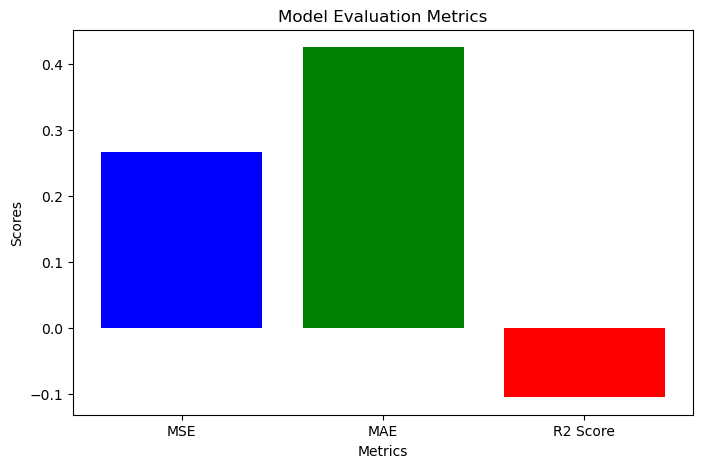

In [115]:
# Visualizing evaluation Metric Score chart
# Visualization of evaluation metrics
metrics = ['MSE', 'MAE', 'R2 Score']
scores = [mse, mae, r2]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'green', 'red'])
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Evaluation Metrics")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

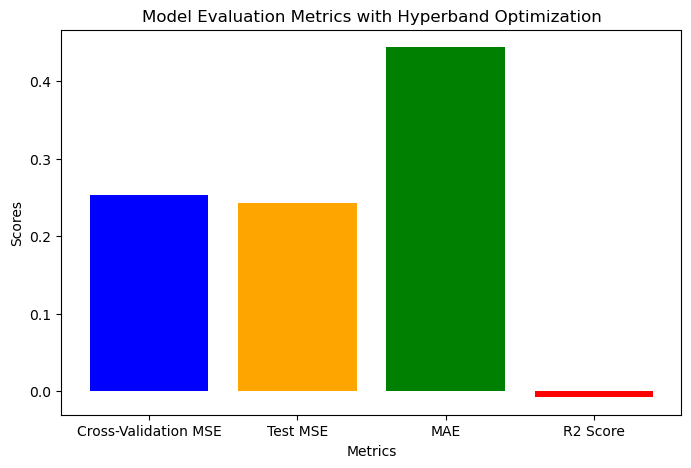

In [121]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

metrics = ['Cross-Validation MSE', 'Test MSE', 'MAE', 'R2 Score']
scores = [cv_mse, mse, mae, r2]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Evaluation Metrics with Hyperband Optimization")
plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [123]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.24978628489337068
Mean Absolute Error: 0.42787689746842034
R-squared Score: -0.03676001541624907


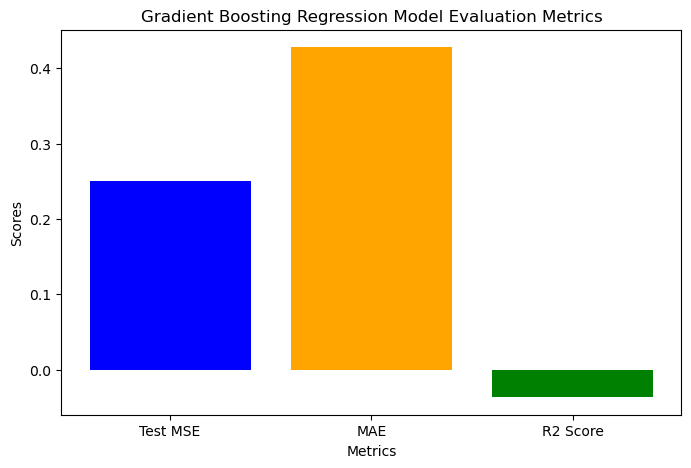

In [125]:
# Visualization of evaluation metrics
metrics = ['Test MSE', 'MAE', 'R2 Score']
scores = [mse, mae, r2]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Gradient Boosting Regression Model Evaluation Metrics")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

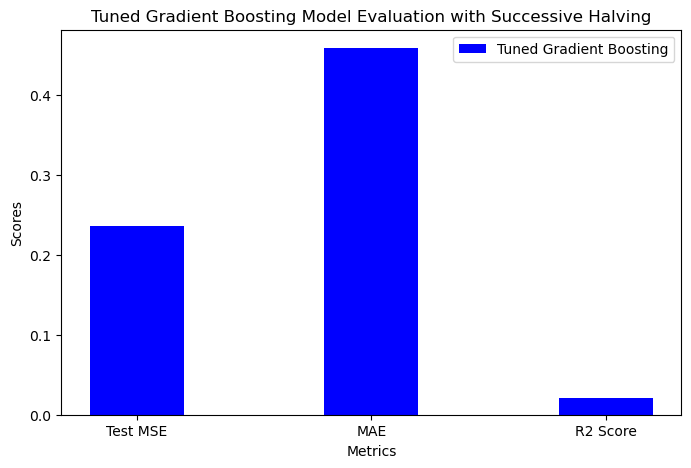

In [135]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Visualization of evaluation metrics

metrics = ['Test MSE', 'MAE', 'R2 Score']
scores_gbr = [mse_gbr, mae_gbr, r2_gbr]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, scores_gbr, width=0.4, label='Tuned Gradient Boosting', color='blue', align='center')
plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Tuned Gradient Boosting Model Evaluation with Successive Halving")
plt.legend()
plt.show()

### ML Model - 3

In [137]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("XGBoost Regressor:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"R-squared Score: {r2_xgb}")

XGBoost Regressor:
Mean Squared Error: 0.3373166405698632
Mean Absolute Error: 0.43953264663910624
R-squared Score: -0.40006232261657715


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

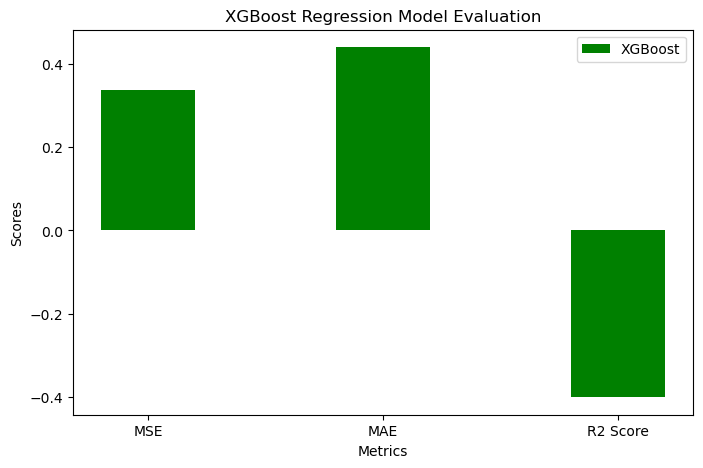

In [139]:
# Visualizing evaluation Metric Score chart
# Visualization of evaluation metrics
metrics = ['MSE', 'MAE', 'R2 Score']
scores_xgb = [mse_xgb, mae_xgb, r2_xgb]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, scores_xgb, width=0.4, label='XGBoost', color='green', align='center')
plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("XGBoost Regression Model Evaluation")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

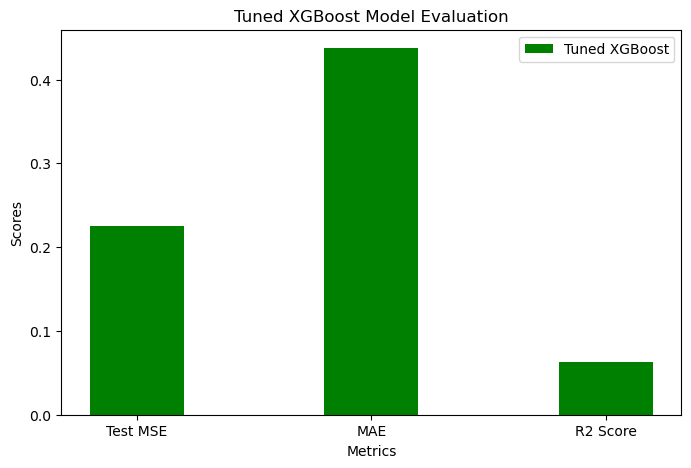

In [143]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Visualization of evaluation metrics
metrics = ['Test MSE', 'MAE', 'R2 Score']
scores_xgb = [mse_xgb, mae_xgb, r2_xgb]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, scores_xgb, width=0.4, label='Tuned XGBoost', color='green', align='center')
plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Tuned XGBoost Model Evaluation")
plt.legend()
plt.show()

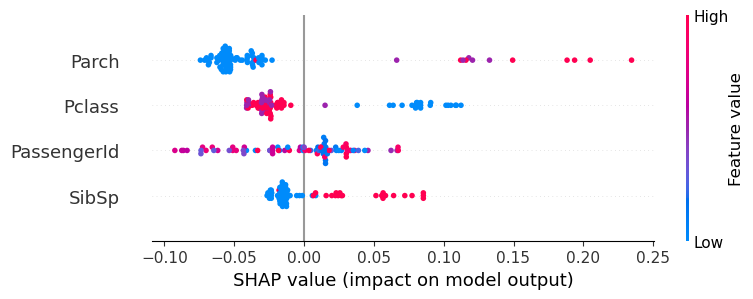

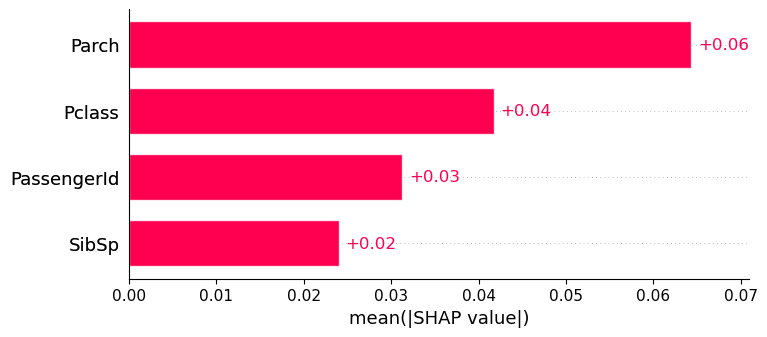

In [149]:
import shap
explainer = shap.Explainer(best_xgb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values)


# **Conclusion**

##### The following are the conclusions for the dataset:-

1) There are total 12 columns and 418 rows, out of which no row is duplicated.
2) There are 3 columns which are Age, Fare and Cabin having null value count as 86, 1 and 327 respectively, all three columns null values replaced with "Not Available" Statement.
3) According to the analysis 152 people survived out of 418 people.
4) Total male passengers are 266 and female passengers are 152 out of which only female survived.
5) Out of total 152 female passengers survived ,maximum no of female embarked from Queenstown followed by Cherbourg and Southampton which has a count of 52, 39 and 33 respectively, rest 28 female passengers embarked location is not available according to the dataset.
6) According to Passenger Class type most no of people survived are from first class followed by third class and second class.
7) There is strong correlation between age and fare followed by between SibSp and Parch with values being 0.338 and 0.307 respectively.

##### According to the conclusion Age and Fare are stringly correlated and also only female passengers survived with first class type being the top at count.